Current error: 1.3638079012812616
Current number of layers: 0
Current error: 1.3638079012812616
Current number of layers: 0
Full statevector:
 Statevector([0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.000

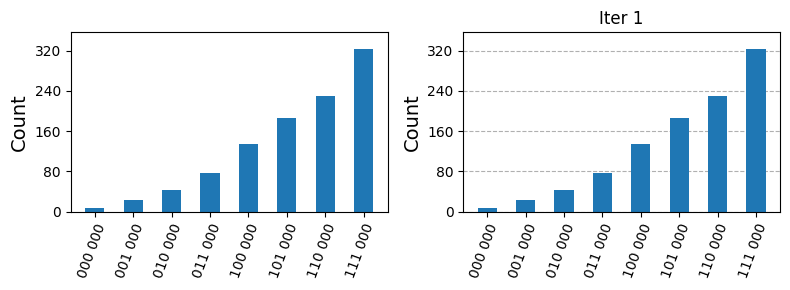

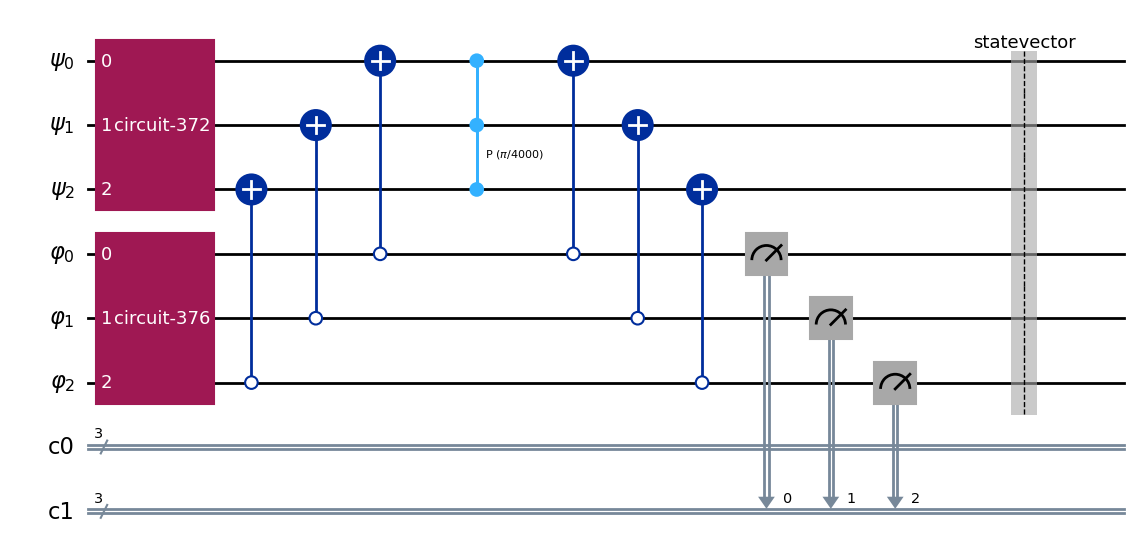

In [8]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace, DensityMatrix, state_fidelity


psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3  
m = 2
delta = np.pi / 4000  # Phase to be added
number_of_layers = 2

psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)

U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)

U_phi_dagger = U_phi.inverse()

psi_reg = QuantumRegister(n, name="ψ")
phi_reg = QuantumRegister(n, name="φ")
cregs = [ClassicalRegister(n, name=f"c{k}") for k in range(m)]
qc = QuantumCircuit(psi_reg, phi_reg, *cregs)

#for psi
qc.append(U_psi, psi_reg)

#for phi
qc.append(U_phi, phi_reg)

# bit matching
for k in range(1, m):
    for i in range(n):
        qc.cx(phi_reg[n-1-i], psi_reg[n-1-i], ctrl_state=0)

# add phase
    qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])

# reset the circuit
    for i in range(n):
        qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

    
    qc.measure(phi_reg, cregs[k])
    
    if k < m-1:
        
        qc.append(U_phi, phi_reg)

qc.save_statevector()

#simulate
sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()

# Full statevector
full = result.get_statevector(qc)

rho_psi = partial_trace(full, list(range(n, 2*n)))

print("Full statevector:\n", full)

#hostogram
num_cols = min(3, m)   # up to 5 histograms per row
num_rows = int(np.ceil(m / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 3*num_rows))

# Flatten axes so we can index safely regardless of 1D or 2D
if num_rows == 1:
    axes = np.array(axes).reshape(-1)
axes = axes.flatten()

for k in range(m):
    counts = result.get_counts(qc)
    plot_histogram(counts, ax=axes[k], title=f"Iter {k}", bar_labels=False)

# Hide any unused subplots
for k in range(m, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()



# Measurement Z






qc.draw('mpl')


Current error: 1.3638079012812616
Current number of layers: 0
Current error: 1.3638079012812616
Current number of layers: 0
Full statevector:
 Statevector([0.070014  +1.82202656e-18j, 0.14002801+3.64405311e-18j,
             0.21004201+5.46607967e-18j, 0.28005602+7.28810622e-18j,
             0.35006991+2.74944323e-04j, 0.42008286+9.89798750e-04j,
             0.49009803+1.27541859e-17j, 0.56011186+4.39910917e-04j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
             0.        +0.000

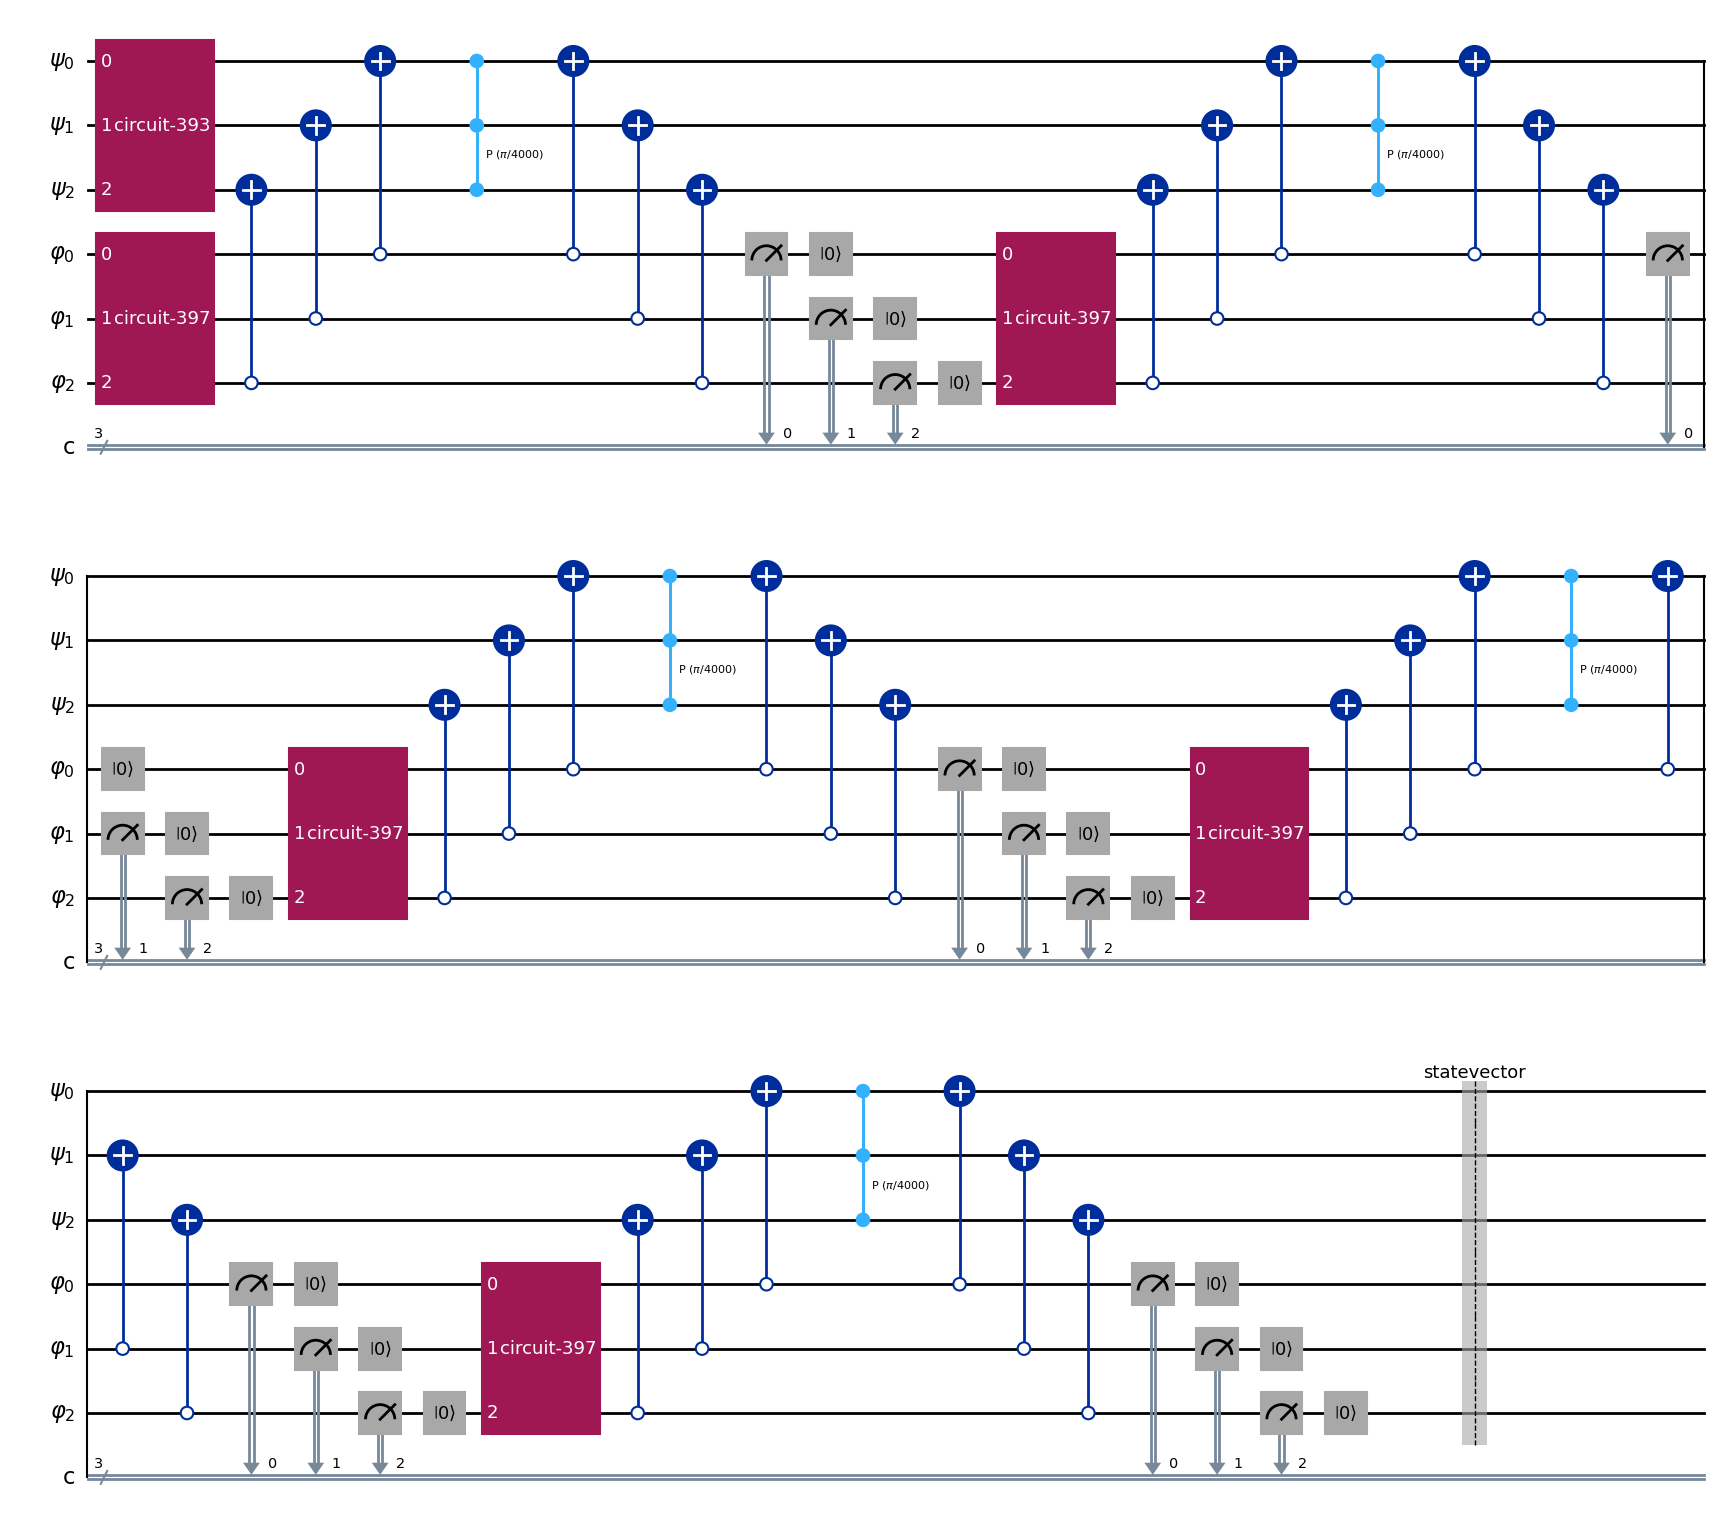

In [9]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace

psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3  
m = 5
delta = np.pi / 4 / 1000  # Phase to be added
number_of_layers = 2

psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)

U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)

# No U_phi_dagger anymore
# U_phi_dagger = U_phi.inverse()

psi_reg = QuantumRegister(n, name="ψ")
phi_reg = QuantumRegister(n, name="φ")
creg = ClassicalRegister(n, name="c")
qc = QuantumCircuit(psi_reg, phi_reg, creg)

# initialize ψ and φ
qc.append(U_psi, psi_reg)
qc.append(U_phi, phi_reg)

# main loop
for k in range(1, m + 1):
    # --- mark (CNOTs using ctrl_state=0) ---
    for i in range(n):
        qc.cx(phi_reg[n - 1 - i], psi_reg[n - 1 - i], ctrl_state=0)

    # --- apply small phase ---
    qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])

    # --- uncompute the flags ---
    for i in range(n):
        qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

    # --- measure φ directly, then reset ---
    qc.measure(phi_reg, creg)   # measure program register
    qc.reset(phi_reg)           # reset φ to |0...0>

    # --- re-prepare φ for next iteration ---
    if k < m:
        qc.append(U_phi, phi_reg)

qc.save_statevector()

# simulate
sim = AerSimulator()
result = sim.run(transpile(qc, sim)).result()

# Full statevector
full = result.get_statevector(qc)

rho_psi = partial_trace(full, list(range(n, 2 * n)))

print("Full statevector:\n", full)

# Measurement Z
probabilities = full.probabilities_dict()
print("\nMeasurement prob:", probabilities)

# Plot histogram
plot_histogram(probabilities)
plt.show()

qc.draw('mpl')


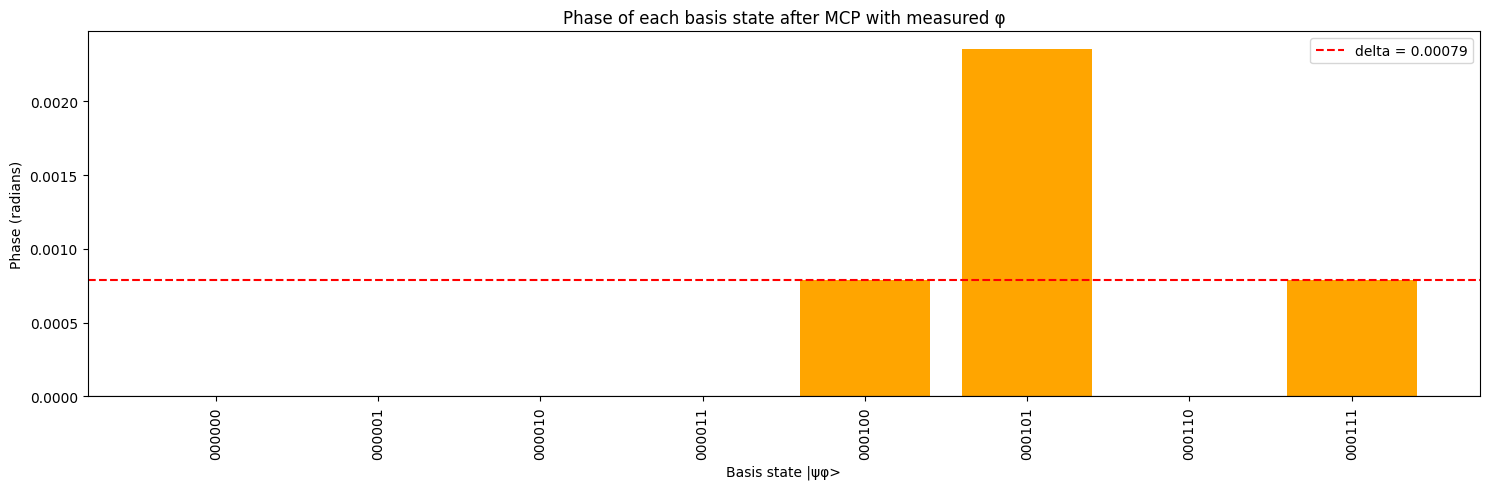

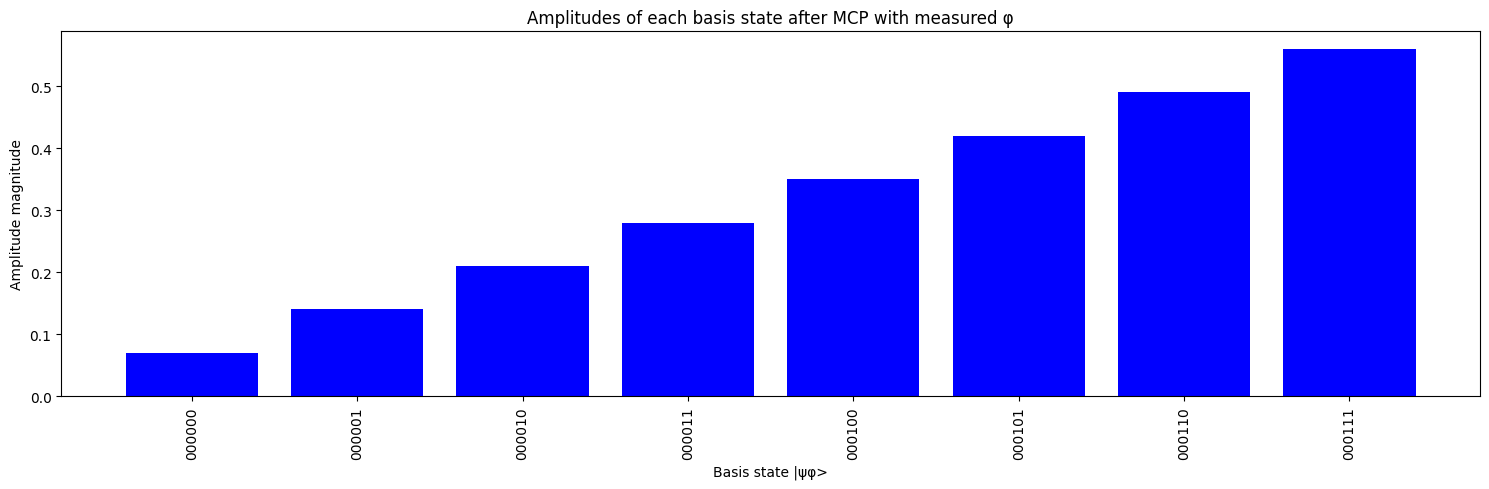

In [10]:
# Get amplitudes and phases
amps = np.abs(full)
phases = np.angle(full)

# Create basis labels for the full 2n-qubit system (ψ + φ)
basis_labels = [format(i, f'0{2*n}b') for i in range(len(amps))]

# Plot phases vs basis states (first 8 states corresponding to ψ)
plt.figure(figsize=(15,5))
plt.bar(basis_labels[0:8], phases[0:8], color='orange')
plt.axhline(delta, color='red', linestyle='--', label=f'delta = {delta:.5f}')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Phase (radians)")
plt.xlabel("Basis state |ψφ>")
plt.xticks(rotation=90)
plt.title("Phase of each basis state after MCP with measured φ")
plt.legend()
plt.tight_layout()
plt.show()

# Plot amplitudes separately (optional)
plt.figure(figsize=(15,5))
plt.bar(basis_labels[0:8], amps[0:8], color='blue')
plt.ylabel("Amplitude magnitude")
plt.xlabel("Basis state |ψφ>")
plt.title("Amplitudes of each basis state after MCP with measured φ")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
